In [2]:
pip install opencv


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


In [11]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("sample1.jpeg")

## Binarization
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

## Skew Correction
coords = np.column_stack(np.where(binary > 0))
angle = cv2.minAreaRect(coords)[-1]
rows, cols = img.shape[:2]
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
rotated = cv2.warpAffine(img, M, (cols, rows), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

## Noise Removal
# denoised = cv2.fastNlMeansDenoisingColored(rotated, None, 10, 10, 7, 15)

## Resizing 
resized = cv2.resize(rotated, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

## Contrast Enhancement
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced = clahe.apply(cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY))



In [3]:
print(enhanced.shape)

(2312, 1300)


In [12]:


# ## Grayscale Conversion 
gray = cv2.cvtColor(rotated, cv2.COLOR_BGR2GRAY)

# Save the preprocessed image
cv2.imwrite('preprocessed.jpg', gray)
cv2.imshow('preprocessed.jpg',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("preprocessed.jpg")

## Text Segmentation
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# # Adaptive Thresholding with multiple kernel sizes
# kernel_sizes = [7, 11, 15]
# thresholded_images = []

# for kernel_size in kernel_sizes:
#     adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, kernel_size, 2)
#     thresholded_images.append(adaptive_thresh)

# # Combine the thresholded images using bitwise OR
# final_thresh = cv2.bitwise_or(*thresholded_images)

# # Morphological Gradient
# kernel = np.ones((3, 3), np.uint8)
# gradient = cv2.morphologyEx(final_thresh, cv2.MORPH_GRADIENT, kernel)

# # Text Segmentation with Padding
# for cnt in contours:
#     x, y, w, h = cv2.boundingRect(cnt)
#     x, y, w, h = x-10, y-10, w+20, h+20
#     cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
#     text_region = img[y:y+h, x:x+w]
#     # Process the text region further or pass it to the OCR engine

# Save the processed image
cv2.imwrite('processed.jpg', eroded)

# Display the processed image
cv2.imshow('Processed Image', eroded)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'eroded' is not defined

Matplotlib is building the font cache; this may take a moment.


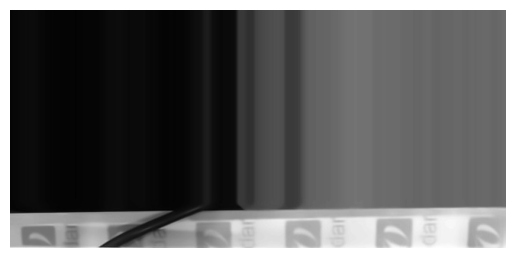

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = 'preprocessed.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Threshold the image
_, thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour
largest_contour = max(contours, key=cv2.contourArea)

# Get the bounding box of the largest contour
x, y, w, h = cv2.boundingRect(largest_contour)

# Crop the image using the bounding box
cropped_image = image[y:y+h, x:x+w]

# Save the cropped image
cv2.imwrite('cropped_image.jpg', cropped_image)

# Display the cropped image
plt.imshow(cropped_image, cmap='gray')
plt.axis('off')
plt.show()


In [9]:
import pytesseract
from PIL import Image



# Set up the Tesseract executable path (adjust the path if necessary)
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\Admin\AppData\Local\Programs\TesseractOCR\tesseract.exe'

# Function to preprocess the image
def preprocess(img):
  # Convert the image to grayscale
  gray = img.convert('L')

  # Apply thresholding using point-to-point operation
  thresh = gray.point(lambda x: 0 if x < 127 else 255)

  # Pad the image manually (adjust padding size as needed)
  padding = 1
  width, height = img.size
  new_width = width + padding * 2
  new_height = height + padding * 2
  padded_image = Image.new('L', (new_width, new_height), color=255)  # White background
  padded_image.paste(thresh, (padding, padding))

  # Dilate the padded image
  from PIL import ImageOps
  dilated = ImageOps.expand(padded_image)

  return dilated

# Load the image
img = Image.open("sample1.jpeg")  # Replace "sample1.jpeg" with your image path

# Preprocess the image
preprocessed_img = preprocess(img)

# Extract text from the image using Tesseract OCR
text = pytesseract.image_to_string(preprocessed_img)

# Print the extracted text
print(text)


Certificate of Virtual Internship

This isto certify that

VISHAKHA SANJEEV SHINDE

international institute of Information Technology (IA"T)

fhas successfully completed 10 weeks
AUML Virtual Internship
During tanuary - March 2024

Supported By ; India Edu Program,

Go gle for Developers

Gentea © 285M 3ea 80
Sudo D Srp encndraaee


